<a href="https://colab.research.google.com/github/lindadelacombaz/pytorch-tutorial/blob/main/00_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Pytorch Fundamentals

In [ ]:
import torch
print(torch.__version__)

2.4.1+cu121


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Basics

[Tensors](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

#### 1.1 Initialization

In [ ]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
scalar.item()

7

In [ ]:
vector_1 = torch.tensor([1,7])
vector_1
vector_1.ndim

1

In [ ]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

From data

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

From another tensor

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1816, 0.9998],
        [0.5944, 0.6541]]) 



With random or constant values

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0337, 0.1716, 0.3336],
        [0.5782, 0.0600, 0.2846]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### 1.2 Attributes of a Tensor

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#### 1.3 Indexing (selecting data from tensors)

In [ ]:
import torch

In [ ]:
x_range = torch.arange(1,10)
x_range

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x = torch.arange(1,10).reshape(1,3,3)

In [ ]:
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
x[0][0]

tensor([1, 2, 3])

In [ ]:
x[0,0]

tensor([1, 2, 3])

In [ ]:
x[0,0,2]

tensor(3)

In [ ]:
x[:,:,1]

tensor([[2, 5, 8]])

In [ ]:
x[:,1,1]

tensor([5])

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Difference between tuples and tensors?
Tensor --> stores order, element, multi-dim array, num data

Tuples --> general purpose, 1dim collection but can be higher

#### 1.4 Numpy to Tensor

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

In [ ]:
array = np.arange(1.0,  8.0)
tensor = torch.from_numpy(array)  # when converting from numpy --> pytorch, pytorch relfects numpy's default dataype of float64
# convert fo float64 to float 32 !
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
np.add(array, 1, out = array)
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([2., 3., 4., 5., 6., 7., 8.], dtype=torch.float64))

In [ ]:
array.dtype

dtype('float64')

In [ ]:
torch.arange(1.0, 8.0).dtype

torch.float32

raw data --> we prefer to have the simpler version
Machine Learning  

#### 1.5 Tensor to Numpy array

In [ ]:
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
numpy_tensor.dtype

dtype('float32')

default pytorch = float32, default numpy = float 64!

In [ ]:
tensor.add_(1)
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([2., 2., 2., 2., 2., 2., 2.], dtype=float32))

but...

In [ ]:
tensor = tensor + 1
tensor, numpy_tensor

(tensor([3., 3., 3., 3., 3., 3., 3.]),
 array([2., 2., 2., 2., 2., 2., 2.], dtype=float32))

#### 1.6 Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described here.

Each of these operations can be run on the GPU (at typically higher speeds than on a CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

Concatenation

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


Arithmetic

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [ ]:
y3

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [ ]:
z1

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

Single-elements tensors

If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():

In-place operations

Operations that store the result into the operand are called in-place. They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg, agg_item, type(agg_item))

tensor(12.) 12.0 <class 'float'>


In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


#### 1.7 Reproducibility

In [ ]:
torch.rand(3,3)

tensor([[0.4761, 0.7792, 0.3722],
        [0.2147, 0.3288, 0.1265],
        [0.6783, 0.8870, 0.0293]])

In [ ]:
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)

tensor([[0.6161, 0.7583, 0.5907, 0.3219],
        [0.7610, 0.7628, 0.6870, 0.4121],
        [0.3676, 0.5535, 0.4117, 0.3510]])
tensor([[0.8196, 0.9297, 0.4505, 0.3881],
        [0.5073, 0.4701, 0.6202, 0.6401],
        [0.0459, 0.3155, 0.9211, 0.6948]])


In [ ]:
# Reproducible
import torch
# Set random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

#torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])


In [ ]:
# Set random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

#torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])


Investigate the random seed / how it works

## 2. [Data Sets and DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#datasets-dataloaders)

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

##### Difference between torch_geometric.loader.DataLoader and torch.utils.data.DataLoader (answer by ChatGPT)

The main difference between torch_geometric.loader.DataLoader and torch.utils.data.DataLoader lies in their intended usage and how they handle data specific to graph structures, particularly for graph neural networks (GNNs). Let's break them down:

1. torch_geometric.loader.DataLoader
This DataLoader is part of the PyTorch Geometric library, which is specialized for handling graph data structures. It is specifically designed to load batches of graphs, which are typically represented as torch_geometric.data.Data objects.

Key Features:
Efficiently loads batches of graphs for graph neural network training.
Supports features like mini-batching of multiple graphs, which is crucial for GNN training where you often deal with datasets composed of many small graphs (e.g., molecules, social networks).
It understands the internal graph structure (nodes, edges, features, etc.) and can handle node and edge connectivity when creating batches.
When mini-batching, it automatically handles the merging of node and edge features by combining graphs into a single large graph where nodes and edges are relabeled to avoid conflicts.
Typically used when working with datasets like Planetoid, TUDataset, or QM9, where graphs of various sizes need to be processed in batches.
2. torch.utils.data.DataLoader
This is the generic DataLoader provided by PyTorch, and it is designed for handling general types of datasets (e.g., images, text, tabular data).

Key Features:
It works with any dataset that follows the torch.utils.data.Dataset interface, which can include tensors, images, or other arbitrary data types.
It supports loading batches, shuffling, sampling, and other data-related operations that are typical in machine learning workflows.
While powerful and flexible, it doesn't have built-in support for graph structures, so using it with graph data would require custom handling of node and edge connectivity when batching.
Summary
Use torch_geometric.loader.DataLoader when working with graph-structured data in PyTorch Geometric, as it simplifies batching and handling the complex structure of graphs.
Use torch.utils.data.DataLoader for general-purpose data loading, like image, text, or numeric data.

#### 2.1 Importing MNIST DataSet

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data", # root is the path where the train/test data is stored
    train=True, # train specifies training or test dataset
    download=True, # download=True downloads the data from the internet if it’s not available at root
    transform=ToTensor() # transform and target_transform specify the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15932570.07it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 266313.18it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5021208.20it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4858748.20it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Iterating and Visualizing the Dataset

We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

- size=(1,) indicates that a single random integer is generated. .item() converts the tensor of shape (1,) into a scalar integer.

- training_data[sample_idx] accesses the dataset at sample_idx.
Typically, training_data is a dataset object (such as from torchvision.datasets), where each element is a tuple of an image (img) and its label (label).

-  labels_map[0] = "T-shirt"

- img.squeeze(): Removes any singleton dimensions from the image tensor.
Example: Converts a shape like (1, 28, 28) to (28, 28) if there's only one channel.

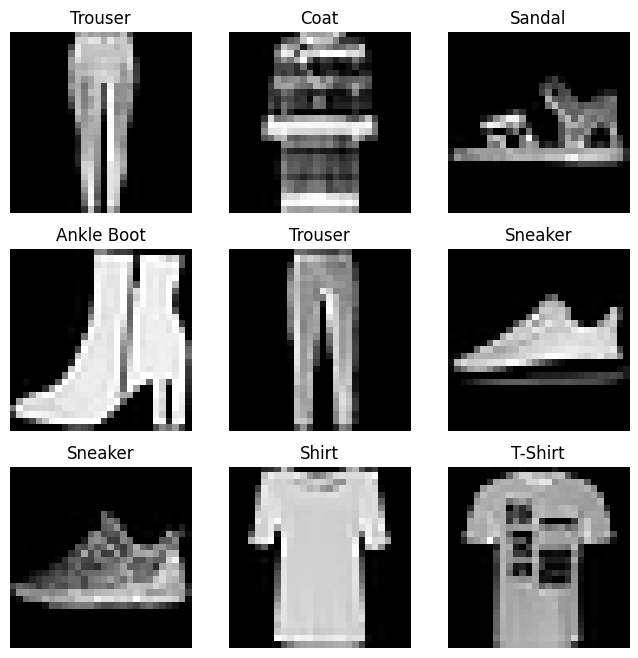

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # generates a random integer between 0 and len(training_data) - 1 (i.e., the valid indices for the training_data dataset)
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### 2.2 Creating a custom DataSet

A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file.


The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # Accesses the first column (index 0) of the img_labels DataFrame at row idx, which contains the image filename.
        image = read_image(img_path) #  Loads the image from the file path (img_path) into memory.
        label = self.img_labels.iloc[idx, 1] # Accesses the second column (index 1) of the img_labels DataFrame at row idx, which contains the label associated with the image.
        if self.transform:
            image = self.transform(image) # Applies any transformations to the image (e.g., resizing, normalization, augmentation)
        if self.target_transform:
            label = self.target_transform(label) # Applies transformations to the label if a target transform function is provided (useful if you need to modify the labels, such as one-hot encoding).
        return image, label

The __len__ function returns the number of samples in our dataset.

The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

When you create a custom dataset using this class, the __getitem__ method is automatically called when you index the dataset. For example:

```
dataset = CustomImageDataset(annotations_file="labels.csv", img_dir="images/")
image, label = dataset[0]  # This will call the __getitem__ method with idx=0
```



#### 2.3 DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

DataLoader turns our dataset into a Python iterable. More specifically, we want to turn our data into batches (or mini-batches). Why ?
1. More computationally efficient --> break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


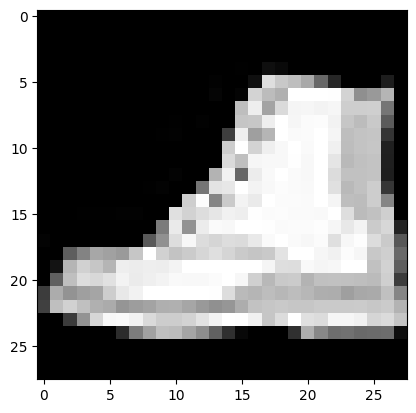

Label: 9


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader)) #  Purpose: Retrieves the next batch from the iterator (in this case, the first batch).
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

- train_features: This will contain a tensor of shape (64, 1, 28, 28) — 64 images, each with 1 channel (grayscale), and 28x28 pixels.
- train_labels: This will be a tensor of shape (64,) containing the labels (class IDs) for those 64 images.
- iter(train_dataloader) produces an iterator that allows you to retrieve the batches one by one.
- next(iter(train_dataloader)) Since we just created the iterator with iter(train_dataloader), calling next() will give us the first batch of data (i.e., the first 64 images and their labels).

#### 2.4 Transforms

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

ToTensor()

ToTensor() converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

Lambda()

Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter_ which assigns a value=1 on the index as given by the label y.

In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

## 3. Neural Networks

### 3.1 Basic NN

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

We want to be able to train our model on a hardware accelerator like the GPU or MPS, if available. Let’s check to see if torch.cuda or torch.backends.mps are available, otherwise we use the CPU.

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

.to(device) : Moves the model's parameters (i.e., the weights and biases) to the specified hardware device, either a CPU or a GPU (if available).

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call model.forward() directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

You’ll also need to move any input data (e.g., images and labels) to the same device as the model before passing it through the network.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9], device='cuda:0')


Breakdown of the elements

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use nn.ReLU between our linear layers, but there’s other activations to introduce non-linearity in your model.

ReLU : max(x,0)

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.4208,  0.0905, -0.0474,  0.1398, -0.0814, -0.0970,  0.3283,  0.2249,
         -0.0301,  0.3358,  0.2520,  0.4348,  0.4176, -0.2684, -0.3173, -0.0727,
          0.5661, -0.3005, -0.1588, -0.4763],
        [-0.1345,  0.4426, -0.1442,  0.0709, -0.0269, -0.2908,  0.6845,  0.0092,
         -0.0335, -0.0664,  0.0018,  0.6956,  0.4585, -0.2912, -0.2314, -0.2167,
          0.1041, -0.1605, -0.7203, -0.4935],
        [ 0.2520,  0.1374,  0.1667,  0.0203,  0.0310, -0.0081,  0.6343,  0.0926,
          0.1515, -0.3364,  0.4892,  0.6402,  0.4768, -0.2245, -0.4404, -0.0885,
          0.7504, -0.2472, -0.2265, -0.6912]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0905, 0.0000, 0.1398, 0.0000, 0.0000, 0.3283, 0.2249, 0.0000,
         0.3358, 0.2520, 0.4348, 0.4176, 0.0000, 0.0000, 0.0000, 0.5661, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.4426, 0.0000, 0.0709, 0.0000, 0.0000, 0.6845, 0.0092, 0.0000,
         0.0000, 0.0018, 0.6956, 0.4585, 0.0000, 0.00

nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

The output layer produces logits, which are raw scores for each class.

Logits to Probabilities: To convert logits into probabilities, we apply a function like softmax (for multi-class classification) or sigmoid (for binary classification):

- Softmax: Converts logits into probabilities by normalizing them so that they sum to 1.
- Sigmoid: Converts a single logit value into a probability between 0 and 1.

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0317,  0.0173, -0.0162,  ..., -0.0158,  0.0334,  0.0196],
        [ 0.0296,  0.0314, -0.0140,  ...,  0.0228,  0.0175, -0.0110]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0124, -0.0056], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0416, -0.0034, -0.0222,  ..., -0.0151,  0.0351, -0.0066],
        [ 0.0170, -0.0006,  0.0402,  ...,  0.0023, -0.0297,  0.0169]],
       device='cuda:0', grad_fn=<Sl

#### 3.1.1 Automatic differentiation

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

1. Forward pass: Calculate predictions.
2. Calculate loss: Measure how far off the predictions are.
3. Backpropagate: Calculate the gradients of the loss with respect to the model's parameters using the chain rule.
4. Update weights: Adjust the parameters using gradient descent to reduce the loss.
5. Repeat: Perform this process over many iterations to train the model.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

In [1]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

1. **torch.nn.functional.binary_cross_entropy_with_logits():**


- This function is a numerically stable version of binary cross-entropy that directly accepts logits as inputs.

- It applies the sigmoid function to the logits z, converting them into probabilities, and then computes the binary cross-entropy between those probabilities and the target y.

z: The logits (raw predictions) from the model.

y: The true labels (in this case, the tensor y contains values like 0s and 1s).


2. **requires_grad=True**

In PyTorch, the requires_grad=True argument is used to tell the framework that you want to compute and track gradients for a particular tensor during the backpropagation process. This is essential for training neural networks, as gradients are used to update the model's parameters (weights and biases) during optimization.

What Does requires_grad=True Do?
When you set requires_grad=True for a tensor, PyTorch will:

Track all operations on the tensor:

Every operation you perform on this tensor (e.g., addition, multiplication) is recorded in a computational graph. This graph keeps track of how each tensor was computed, so that during backpropagation, PyTorch can calculate the derivatives (gradients) of the final loss with respect to each tensor involved in the computation.
Compute gradients during backpropagation:

When you call loss.backward(), PyTorch will automatically compute the gradients of the loss with respect to each tensor that has requires_grad=True. These gradients are stored in the .grad attribute of the tensor.
These gradients are essential for updating the weights during optimization (e.g., using Stochastic Gradient Descent or other optimizers).


You can set the value of requires_grad when creating a tensor, or later by using x.requires_grad_(True) method.

In [2]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x79aa937215a0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x79aa93721600>


#### 3.1.2 Computing Gradients

To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need and under some fixed values of x and y. To compute those derivatives, we call loss.backward(), and then retrieve the values from w.grad and b.grad.

In [3]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2145, 0.0848, 0.3313],
        [0.2145, 0.0848, 0.3313],
        [0.2145, 0.0848, 0.3313],
        [0.2145, 0.0848, 0.3313],
        [0.2145, 0.0848, 0.3313]])
tensor([0.2145, 0.0848, 0.3313])


Disabling gradient computing

By default, all tensors with requires_grad=True are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with torch.no_grad() block:

In [4]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the detach() method on the tensor:

In [5]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:
To mark some parameters in your neural network as frozen parameters.

To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

#### 3.1.3 Optimizing Model Parameters

Now that we have a model and data it’s time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters (as we saw in the previous section), and optimizes these parameters using gradient descent. For a more detailed walkthrough of this process, check out this video on backpropagation from 3Blue1Brown.

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

100%|██████████| 26421880/26421880 [00:01<00:00, 18871250.04it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 302947.33it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5486444.87it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17315378.50it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



#### Hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates (read more about hyperparameter tuning)

We define the following hyperparameters for training:
- Number of Epochs - the number times to iterate over the dataset

- Batch Size - the number of data samples propagated through the network before the parameters are updated

- Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [3]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

#### Optimization Loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an epoch.

Each epoch consists of two main parts:
The Train Loop - iterate over the training dataset and try to converge to optimal parameters.

The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.

#### Loss Function

When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include nn.MSELoss (Mean Square Error) for regression tasks, and nn.NLLLoss (Negative Log Likelihood) for classification. nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss.

We pass our model’s output logits to nn.CrossEntropyLoss, which will normalize the logits and compute the prediction error.

In [4]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

#### Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; additionally, there are many different optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [5]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:

- Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.

- Backpropagate the prediction loss with a call to loss.backward(). PyTorch deposits the gradients of the loss w.r.t. each parameter.

- Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.

#### Full Implementation

We define train_loop that loops over our optimization code, and test_loop that evaluates the model’s performance against our test data.

In [6]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297569  [   64/60000]
loss: 2.289386  [ 6464/60000]
loss: 2.265592  [12864/60000]
loss: 2.264091  [19264/60000]
loss: 2.253671  [25664/60000]
loss: 2.218117  [32064/60000]
loss: 2.236205  [38464/60000]
loss: 2.202128  [44864/60000]
loss: 2.196248  [51264/60000]
loss: 2.163363  [57664/60000]
Test Error: 
 Accuracy: 37.2%, Avg loss: 2.159520 

Epoch 2
-------------------------------
loss: 2.161667  [   64/60000]
loss: 2.156657  [ 6464/60000]
loss: 2.092937  [12864/60000]
loss: 2.117291  [19264/60000]
loss: 2.072376  [25664/60000]
loss: 2.001410  [32064/60000]
loss: 2.042696  [38464/60000]
loss: 1.959597  [44864/60000]
loss: 1.960072  [51264/60000]
loss: 1.892671  [57664/60000]
Test Error: 
 Accuracy: 55.2%, Avg loss: 1.891707 

Epoch 3
-------------------------------
loss: 1.909461  [   64/60000]
loss: 1.888612  [ 6464/60000]
loss: 1.763058  [12864/60000]
loss: 1.818992  [19264/60000]
loss: 1.716103  [25664/60000]
loss: 1.649371  [32064/600

#### Saving and Loading Weights

PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted via the torch.save method:

1. torch.save() - save a pytorch object in python's pickle (pure Python) format
2. torch.load() - allows you load a saved PyTorch object
3. torch.nn.Model.load_state_dict() - this allows to load a model's saved state dictionary

1. Saving and Loading Model Weights

In [9]:
import torch
import torchvision.models as models

In [10]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 99.7MB/s]


To load model weights, you need to create an instance of the same model first, and then load the parameters using load_state_dict() method.

In the code below, we set weights_only=True to limit the functions executed during unpickling to only those necessary for loading weights. Using weights_only=True is considered a best practice when loading weights.

In [11]:
model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

be sure to call model.eval() method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.

2. Saving and Loading Models with Shapes

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass model (and not model.state_dict()) to the saving function:

In [12]:
torch.save(model, 'model.pth')

We can then load the model as demonstrated below.

As described in Saving and loading torch.nn.Modules, saving state_dict``s is considered the best practice. However, below we use ``weights_only=False because this involves loading the model, which is a legacy use case for torch.save.

In [13]:
model = torch.load('model.pth', weights_only=False)

## 4. A 60 minutes Blitz of deep learning with Pytorch

#### 4.1 Torchgrad


torch.autograd is PyTorch’s automatic differentiation engine that powers neural network training. In this section, you will get a conceptual understanding of how autograd helps a neural network train.

Background
Neural networks (NNs) are a collection of nested functions that are executed on some input data. These functions are defined by parameters (consisting of weights and biases), which in PyTorch are stored in tensors.

Training a NN happens in two steps:

Forward Propagation: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.

Backward Propagation: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent. For a more detailed walkthrough of backprop, check out this video from 3Blue1Brown.


Let’s take a look at a single training step. For this example, we load a pretrained resnet18 model from torchvision. We create a random data tensor to represent a single image with 3 channels, and height & width of 64, and its corresponding label initialized to some random values. Label in pretrained models has shape (1,1000).

In [1]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 44.7MB/s]


In [2]:
prediction = model(data) # forward pass

In [3]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [4]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Finally, we call .step() to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in .grad

In [5]:
optim.step() #gradient descent

## 5. Performing Data Preprocessing on Custom Dataset

GeeksforGeeks link [here](https://www.geeksforgeeks.org/data-preprocessing-in-pytorch/)

Define a Class for Custom Dataset
The CustomDataset class inherits from PyTorch’s Dataset. The class loads data from a csv file, preprocess it and provides methods for accessing individual samples.

- __init__ Method: The constructor initializes the dataset by loading the CSV file specified by csv_file. It also accepts an optional transform argument for applying additional transformations (not used in this example).
Data Preprocessing: The CSV file is loaded into a pandas DataFrame, missing values are handled using SimpleImputer, categorical variables are encoded using LabelEncoder, and numerical features are scaled using StandardScaler.
- __len__ Method: This method returns the total number of samples in the dataset.
- __getitem__ Method: This method is used to access individual samples from the dataset. It returns a tuple containing the sample (features) and its corresponding target (label).

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [8]:
class CustomDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

        # Handle missing values
        imputer = SimpleImputer(strategy='mean')
        self.data.fillna(self.data.mean(), inplace=True)

        # Encode categorical variables
        label_encoders = {}
        for column in self.data.select_dtypes(include=['object']).columns:
            label_encoders[column] = LabelEncoder()
            self.data[column] = label_encoders[column].fit_transform(self.data[column])

        # Scale numerical features
        scaler = StandardScaler()
        self.data[self.data.select_dtypes(include=['number']).columns] = scaler.fit_transform(self.data[self.data.select_dtypes(include=['number']).columns])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = torch.tensor(self.data.iloc[idx, :-1], dtype=torch.float)
        target = torch.tensor(self.data.iloc[idx, -1], dtype=torch.long)

        if self.transform:
            sample = self.transform(sample)

        return sample, target